### Dataset: ICT Adoption (Internet Users 1995-2024) from Our World in Data

Data Type: Time Series Line Chart - perfect for showing trends over time across multiple countries

Key Variables:

Entity: Countries
Year: Time (1960-2024)

it_mlt_main: IT main lines (likely telephone landlines)

it_net_bbnd: Internet broadband subscriptions

it_cel_sets: Cellular phone subscriptions

num_internet_users: Number of internet users


#### Why Line Charts for This Data?

Line charts are ideal for time series data because they:

Show trends and patterns over time clearly

Allow easy comparison between multiple countries

Reveal growth rates and inflection points

Display continuous data relationships effectively

In [ ]:
!pip install seaborn

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/ict-adoption.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/ict-adoption.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

        Entity Code  Year  it_mlt_main  it_net_bbnd  it_cel_sets  \
0  Afghanistan  AFG  1960       7700.0          NaN          0.0   
1  Afghanistan  AFG  1961       7700.0          NaN          NaN   
2  Afghanistan  AFG  1962       7700.0          NaN          NaN   
3  Afghanistan  AFG  1963       7700.0          NaN          NaN   
4  Afghanistan  AFG  1964       7700.0          NaN          NaN   

   num_internet_users  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entity              13389 non-null  object 
 1   Code                12400 non-null  object 
 2   Year                13389 non-null  int64  
 3   it_mlt_main         12378 non-null  float64
 4   it_net_bbnd         4409 non-null   floa

##### Key Insights from the Data
The visualization reveals China's explosive internet growth starting around 2005, while developed countries like the US, Germany, and Japan show steady, earlier adoption. India shows dramatic recent growth, reflecting mobile internet expansion.

In [13]:
# Clean the data - focus on key countries and recent years for clarity
key_countries = ['United States', 'China', 'Germany', 'Japan', 'India', 'Brazil']
df_filtered = df[df['Entity'].isin(key_countries) & (df['Year'] >= 1995)].copy()

# Remove rows where all technology columns are NaN
tech_cols = ['it_mlt_main', 'it_net_bbnd', 'it_cel_sets', 'num_internet_users']
df_filtered = df_filtered.dropna(subset=tech_cols, how='all')

print(f"Filtered dataset shape: {df_filtered.shape}")

Filtered dataset shape: (174, 7)


### Good plot

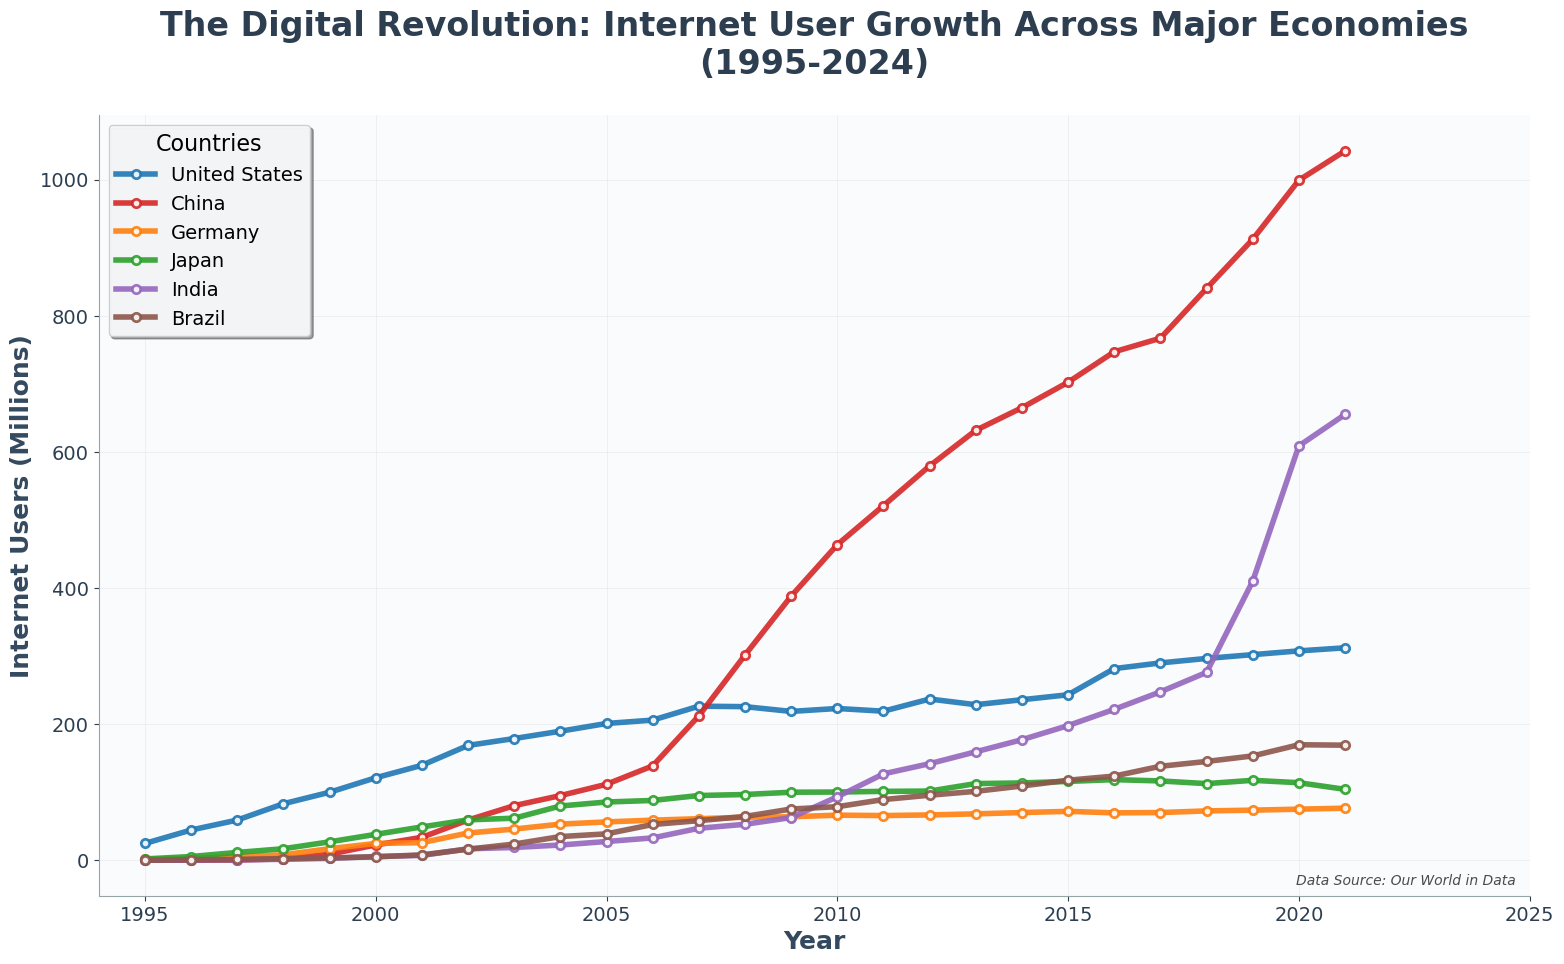

In [ ]:
# Good plot color palette 
colors = {
    'United States': '#1f77b4',  #  blue
    'China': '#d62728',          # Strong red
    'Germany': '#ff7f0e',        # Warm orange
    'Japan': '#2ca02c',          # Forest green
    'India': '#9467bd',          # Purple
    'Brazil': '#8c564b'          # Brown
}

# Setting the style
plt.style.use('default')
fig, ax = plt.subplots(figsize=(16, 10))

# Create line plot with internet users data
internet_data = df_filtered.groupby(['Year', 'Entity'])['num_internet_users'].first().unstack()

for country in key_countries:
    if country in internet_data.columns:
        # Plot with beautiful styling
        ax.plot(internet_data.index, internet_data[country]/1e6, 
               linewidth=4, 
               label=country, 
               color=colors[country],
               marker='o', 
               markersize=6,
               markerfacecolor='white',
               markeredgewidth=2,
               markeredgecolor=colors[country],
               alpha=0.9)

# title and labels
ax.set_title('The Digital Revolution: Internet User Growth Across Major Economies\n(1995-2024)', 
            fontsize=24, fontweight='bold', pad=30, color='#2c3e50')

ax.set_xlabel('Year', fontsize=18, fontweight='semibold', color='#34495e')
ax.set_ylabel('Internet Users (Millions)', fontsize=18, fontweight='semibold', color='#34495e')

# Good legend
legend = ax.legend(loc='upper left', 
                  frameon=True, 
                  fancybox=True, 
                  shadow=True, 
                  fontsize=14,
                  title='Countries',
                  title_fontsize=16)
legend.get_frame().set_facecolor('#f8f9fa')
legend.get_frame().set_alpha(0.95)

# Good grid and styling
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, color='#bdc3c7')
ax.set_facecolor('#fafbfc')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#95a5a6')
ax.spines['bottom'].set_color('#95a5a6')

# Better tick formatting
ax.tick_params(axis='both', which='major', labelsize=14, colors='#2c3e50')
ax.set_xlim(1994, 2025)

# Adding subtle background color
fig.patch.set_facecolor('white')

# Add data source annotation
ax.text(0.99, 0.01, 'Data Source: Our World in Data', 
        transform=ax.transAxes, fontsize=10, 
        ha='right', va='bottom', alpha=0.7, style='italic')

plt.tight_layout(pad=2.0)
plt.savefig('excellent_ict_visualization.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


### Bad Plot:

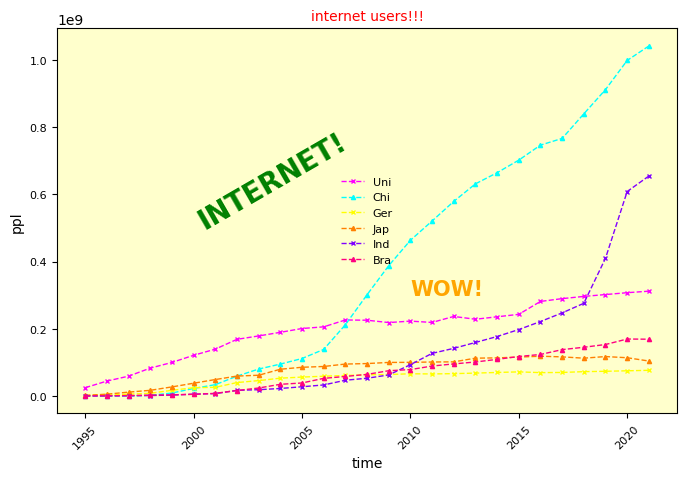

In [ ]:
# bad plot visualization
fig, ax = plt.subplots(figsize=(8, 5))  # Too small

# garish and clashing colors
awful_colors = ['#ff00ff', '#00ffff', '#ffff00', '#ff8000', '#8000ff', '#ff0080']

internet_data = df_filtered.groupby(['Year', 'Entity'])['num_internet_users'].first().unstack()

for i, country in enumerate(key_countries):
    if country in internet_data.columns:
        # Terrible styling choices
        ax.plot(internet_data.index, internet_data[country], 
               linewidth=1,           # Too thin
               label=country[:3],     # Truncated labels
               color=awful_colors[i],
               linestyle='--',        # Inconsistent styles
               marker='x' if i % 2 == 0 else '^',  # Inconsistent markers
               markersize=3)

# Terrible title and labels
ax.set_title('internet users!!!', fontsize=10, color='red')  
ax.set_xlabel('time')  # Vague
ax.set_ylabel('ppl')   # Meaningless abbreviation

# Terrible legend
ax.legend(loc='center', fontsize=8, frameon=False) 

# No grid, cramped layout
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Making it even worse - add unnecessary text
ax.text(2000, 5e8, 'INTERNET!', fontsize=20, color='green', weight='bold', rotation=30)
ax.text(2010, 3e8, 'WOW!', fontsize=15, color='orange', weight='bold')

# Ugly background
ax.set_facecolor('#ffffcc') 

# Saving the plot
plt.savefig('terrible_ict_visualization.png', dpi=72, bbox_inches=None)
plt.show()